In [59]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\MY ASUS\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [60]:
import pyodbc

In [61]:
cnxn_str = ("Driver={SQL Server};"
            "Server=LAPTOP-DQM1AQ20\SQLEXPRESS;"
            "Database=Northwind;"
            "Trusted_Connection=yes;")
cnxn = pyodbc.connect(cnxn_str)

In [62]:
cursor=cnxn.cursor()
cursor.execute("SELECT * FROM ORDERS")

In [63]:
for row in cursor:
    print(row)

(10248, 'VINET', 5, datetime.datetime(1996, 7, 4, 0, 0), datetime.datetime(1996, 8, 1, 0, 0), datetime.datetime(1996, 7, 16, 0, 0), 3, Decimal('32.3800'), 'Vins et alcools Chevalier', "59 rue de l'Abbaye", 'Reims', None, '51100', 'France')
(10249, 'TOMSP', 6, datetime.datetime(1996, 7, 5, 0, 0), datetime.datetime(1996, 8, 16, 0, 0), datetime.datetime(1996, 7, 10, 0, 0), 1, Decimal('11.6100'), 'Toms Spezialitäten', 'Luisenstr. 48', 'Münster', None, '44087', 'Germany')
(10250, 'HANAR', 4, datetime.datetime(1996, 7, 8, 0, 0), datetime.datetime(1996, 8, 5, 0, 0), datetime.datetime(1996, 7, 12, 0, 0), 2, Decimal('65.8300'), 'Hanari Carnes', 'Rua do Paço, 67', 'Rio de Janeiro', 'RJ', '05454-876', 'Brazil')
(10251, 'VICTE', 3, datetime.datetime(1996, 7, 8, 0, 0), datetime.datetime(1996, 8, 5, 0, 0), datetime.datetime(1996, 7, 15, 0, 0), 1, Decimal('41.3400'), 'Victuailles en stock', '2, rue du Commerce', 'Lyon', None, '69004', 'France')
(10252, 'SUPRD', 4, datetime.datetime(1996, 7, 9, 0, 0),

In [64]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\MY ASUS\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [65]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\MY ASUS\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [66]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\MY ASUS\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [67]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\MY ASUS\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [68]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

In [69]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\MY ASUS\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [77]:
supplier_analysis = pd.read_sql('''select c.CategoryName as "Product Category", 
       case when s.Country in 
                 ('UK','Spain','Sweden','Germany','Norway',
                  'Denmark','Netherlands','Finland','Italy','France')
            then 'Europe'
            when s.Country in ('USA','Canada','Brazil') 
            then 'America'
            else 'Asia-Pacific'
        end as "Supplier Continent", 
        sum(p.UnitsInStock) as UnitsInStock
from Suppliers s 
inner join Products p on p.SupplierID=s.SupplierID
inner join Categories c on c.CategoryID=p.CategoryID 
group by c.CategoryName, 
         case when s.Country in 
                 ('UK','Spain','Sweden','Germany','Norway',
                  'Denmark','Netherlands','Finland','Italy','France')
              then 'Europe'
              when s.Country in ('USA','Canada','Brazil') 
              then 'America'
              else 'Asia-Pacific'
         end;

''',cnxn)
supplier_analysis.head()

,Product Category,Supplier Continent,UnitsInStock
0,Beverages,America,203
1,Condiments,America,372
2,Confections,America,17
3,Meat/Poultry,America,136
4,Produce,America,15


In [71]:
category_df = pd.read_sql('''select distinct 
    a.CategoryName,   
    sum(round(y.UnitPrice * y.Quantity * (1 - y.Discount), 2)) as ProductSales
from OrderDetails y
inner join Orders d on d.OrderID = y.OrderID
inner join Products b on b.ProductID = y.ProductID
inner join Categories a on a.CategoryID = b.CategoryID
group by a.CategoryName
order by a.CategoryName,ProductSales;
;
''',cnxn)
category_df.head()

,CategoryName,ProductSales
0,Beverages,267868.20
1,Condiments,106047.11
2,Confections,167357.26
3,Dairy Products,234507.32
4,Grains/Cereals,95744.60


In [72]:
Product_name_df = pd.read_sql('''select distinct 
    b.ProductName, 
    sum(round(y.UnitPrice * y.Quantity * (1 - y.Discount), 2)) as ProductSales
from OrderDetails y
inner join Orders d on d.OrderID = y.OrderID
inner join Products b on b.ProductID = y.ProductID
group by  b.ProductName
order by ProductSales DESC;

''',cnxn)
Product_name_df.head()

,ProductName,ProductSales
0,Côte de Blaye,141396.74
1,Thüringer Rostbratwurst,80368.68
2,Raclette Courdavault,71155.70
3,Tarte au sucre,47234.99
4,Camembert Pierrot,46825.48


In [75]:
employee_sales_df = pd.read_sql('''SELECT E.EmployeeID As Employee_ID, 
COUNT(O.EmployeeID) AS Order_Count, 
CONCAT(E.FirstName, ' ' ,E.LastName) As Full_Name,
E.Title
FROM Orders as O
inner join Employees as E on O.EmployeeID = E.EmployeeID
group by E.EmployeeID, E.FirstName, E.LastName,E.Title
order by Order_Count Desc
''', cnxn)
employee_sales_df.head()

,Employee_ID,Order_Count,Full_Name,Title
0,4,156,Margaret Peacock,Sales Representative
1,3,127,Janet Leverling,Sales Representative
2,1,123,Nancy Davolio,Sales Representative
3,8,104,Laura Callahan,Inside Sales Coordinator
4,2,96,Andrew Fuller,"Vice President, Sales"


In [80]:
discount_df = pd.read_sql('''SELECT SUM(OD.Quantity) AS Total_Items_Sold, Count(OD.OrderID)AS Number_Of_Orders, OD.Discount AS Discount_Percentage
FROM [OrderDetails] as OD
WHERE OD.Discount = 0.05 or OD.Discount =0.1 or OD.Discount =0.2 or OD.Discount =0.25
GROUP BY OD.Discount
ORDER BY OD.Discount DESC;
''', cnxn)
discount_df.head()

,Total_Items_Sold,Number_Of_Orders,Discount_Percentage
0,4349,154,0.25
1,4351,161,0.20
2,4366,173,0.10
3,5182,185,0.05


In [89]:
Customers_df=pd.read_sql('''SELECT c.CompanyName,
SUM((od.Quantity * od.UnitPrice)) AS Total,
CASE
WHEN SUM((od.Quantity * od.UnitPrice)) >= 30000 THEN 'A'
WHEN SUM((od.Quantity * od.UnitPrice)) < 30000 and sum((od.Quantity * od.UnitPrice)) >=
20000 THEN 'B'
ELSE 'C'
END AS Customer_Grade
FROM Customers c
INNER JOIN Orders o
ON c.CustomerID = o.CustomerID
inner join
OrderDetails od
ON o.OrderID = od.OrderID
INNER JOIN
Products p
ON od.ProductID = p.ProductID
GROUP BY  c.CompanyName
ORDER BY Total DESC''',cnxn)
Customers_df.head()

,CompanyName,Total,Customer_Grade
0,QUICK-Stop,117483.39,A
1,Save-a-lot Markets,115673.39,A
2,Ernst Handel,113236.68,A
3,Hungry Owl All-Night Grocers,57317.39,A
4,Rattlesnake Canyon Grocery,52245.90,A


89

In [99]:
df=pd.read_sql('''select distinct a.CategoryID, 
    a.CategoryName,  
    b.ProductName, 
    sum(round(od.UnitPrice * od.Quantity * (1 - od.Discount), 2)) as Totalsales
from OrderDetails od
inner join Orders d on d.OrderID = od.OrderID
inner join Products b on b.ProductID = od.ProductID
inner join Categories a on a.CategoryID = b.CategoryID
where d.OrderDate between ('1997/1/1') and ('1997/12/31')
group by a.CategoryID, a.CategoryName, b.ProductName
order by a.CategoryName, b.ProductName, Totalsales''',cnxn)
df.head()

,CategoryID,CategoryName,ProductName,Totalsales
0,1,Beverages,Chai,4887.00
1,1,Beverages,Chang,7038.55
2,1,Beverages,Chartreuse verte,4475.70
3,1,Beverages,Côte de Blaye,49198.09
4,1,Beverages,Guaraná Fantástica,1630.13


In [73]:
order_details_df.shape

(77, 2)

AttributeError: 'DataFrame' object has no attribute 'Total_Items_Sold'

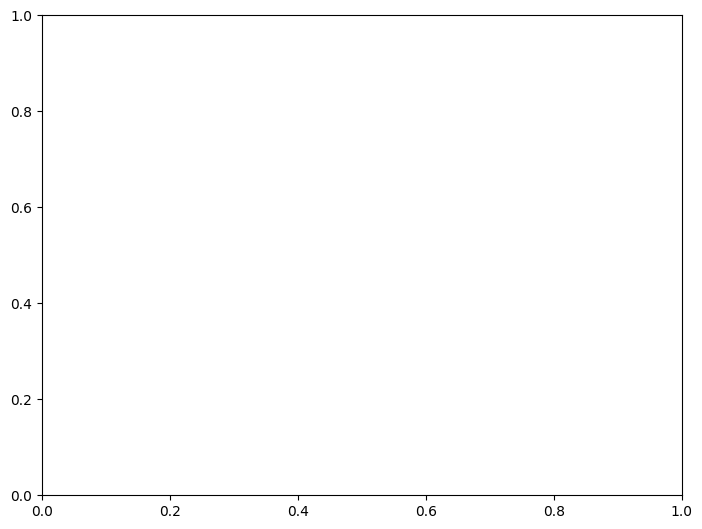

In [74]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(order_details_df.Total_Items_Sold,
color='yellowgreen')

plt.show()

In [58]:
employee_sales_df = pd.read_sql('''SELECT E.EmployeeID As Employee_ID, 
COUNT(O.EmployeeID) AS Order_Count, 
CONCAT(E.FirstName, ' ' ,E.LastName) As Full_Name,
E.Title
FROM Orders as O
inner join Employees as E on O.EmployeeID = E.EmployeeID
group by E.EmployeeID, E.FirstName, E.LastName,E.Title
order by Order_Count Desc
''', cnxn)
employee_sales_df.head()

,Employee_ID,Order_Count,Full_Name,Title
0,4,156,Margaret Peacock,Sales Representative
1,3,127,Janet Leverling,Sales Representative
2,1,123,Nancy Davolio,Sales Representative
3,8,104,Laura Callahan,Inside Sales Coordinator
4,2,96,Andrew Fuller,"Vice President, Sales"
